In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA, TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

### tf-idf word-frequency array

In [2]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [3]:
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(documents)

In [4]:
csr_mat.toarray()

array([[0.51785612, 0.        , 0.        , 0.68091856, 0.51785612,
        0.        ],
       [0.        , 0.        , 0.51785612, 0.        , 0.51785612,
        0.68091856],
       [0.51785612, 0.68091856, 0.51785612, 0.        , 0.        ,
        0.        ]])

In [5]:
words = tfidf.get_feature_names_out()
words

array(['cats', 'chase', 'dogs', 'meow', 'say', 'woof'], dtype=object)

### Clustering Wikipedia

In [6]:
df = pd.read_csv('data/Wikipedia articles/wikipedia-vectors.csv', index_col=0)
df.head()

,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [7]:
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [8]:
svd = TruncatedSVD(n_components=50)
kmeans = KMeans(n_clusters=6)
pipeline = make_pipeline(svd, kmeans)

In [9]:
pipeline.fit(articles)
labels = pipeline.predict(articles)

C:\Users\USER\Documents\projects\data\internship\task\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
df = pd.DataFrame({'label': labels, 'article': titles})
df.sort_values('label')

,label,article
59,0,Adam Levine
50,0,Chad Kroeger
51,0,Nate Ruess
52,0,The Wanted
53,0,Stevie Nicks
58,0,Sepsis
55,0,Black Sabbath
56,0,Skrillex
57,0,Red Hot Chili Peppers
54,0,Arctic Monkeys


### Non-negative Matrix Factorisation (NMF)

In [11]:
nmf = NMF(n_components=6)
nmf.fit(articles)

NMF(n_components=6)

In [12]:
nmf_features = nmf.transform(articles)
nmf_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.38779115e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.64443961e-01],
       [3.77650774e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.97119031e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.80277067e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.83671916e-01],
       [1.27825824e-02, 1.37160989e-02, 7.72589987e-03, 3.32162874e-02,
        0.00000000e+00, 3.33248243e-01],
       [0.00000000e+00, 0.00000000e+00, 2.05713306e-02, 0.00000000e+00,
        6.01711264e-03, 3.57683696e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.89111381e-01],
       [1.52495421e-02, 1.42031887e-02, 3.74809840e-03, 2.35518151e-02,
        2.61391006e-02, 

In [13]:
df = pd.DataFrame(nmf_features, index=titles)
df.head()

,0,1,2,3,4,5
HTTP 404,0.000000,0.0,0.0,0.0,0.0,0.438779
Alexa Internet,0.000000,0.0,0.0,0.0,0.0,0.564444
Internet Explorer,0.003777,0.0,0.0,0.0,0.0,0.397119
HTTP cookie,0.000000,0.0,0.0,0.0,0.0,0.380277
Google Search,0.000000,0.0,0.0,0.0,0.0,0.483672


In [14]:
df.loc['Anne Hathaway']

0    0.003815
1    0.000000
2    0.000000
3    0.571854
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64

In [15]:
df.loc['Denzel Washington']

0    0.000000
1    0.005575
2    0.000000
3    0.419555
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64

In [16]:
nmf.components_

array([[1.15098407e-02, 1.22395345e-03, 0.00000000e+00, ...,
        0.00000000e+00, 4.28389719e-04, 0.00000000e+00],
       [0.00000000e+00, 9.60811375e-06, 5.69490714e-03, ...,
        2.82853727e-03, 2.98998500e-04, 0.00000000e+00],
       [0.00000000e+00, 8.34934868e-06, 0.00000000e+00, ...,
        0.00000000e+00, 1.43963654e-04, 0.00000000e+00],
       [4.17537538e-03, 0.00000000e+00, 3.07654333e-03, ...,
        1.75365764e-03, 6.76501120e-03, 0.00000000e+00],
       [0.00000000e+00, 5.71084327e-04, 4.94127812e-03, ...,
        1.92552989e-04, 1.35791666e-03, 0.00000000e+00],
       [1.38847730e-04, 0.00000000e+00, 8.78204551e-03, ...,
        2.40998382e-03, 1.68875941e-03, 0.00000000e+00]])

In [17]:
with open('data/Wikipedia articles/wikipedia-vocabulary-utf8.txt', 'r') as file1:
    words = file1.readlines()

In [37]:
words = [i[:-1] for i in words]
words

['aaron',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abbas',
 'abbey',
 'abbreviated',
 'abbreviation',
 'abc',
 'abdomen',
 'abdominal',
 'abdul',
 'abel',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormalities',
 'abnormally',
 'aboard',
 'abolish',
 'abolished',
 'abolishing',
 'abolition',
 'aboriginal',
 'abortion',
 'abraham',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'absorption',
 'abstract',
 'abstraction',
 'absurd',
 'abu',
 'abundance',
 'abundant',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'academia',
 'academic',
 'academics',
 'academies',
 'academy',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accession',
 'accessories',
 'accessory',
 'accident',
 'accidental',
 'accidenta

### NMF learns topics of documents

In [38]:
components_df = pd.DataFrame(nmf.components_, columns=words)
components_df

,aaron,abandon,abandoned,abandoning,abandonment,abbas,abbey,abbreviated,abbreviation,abc,...,zealand,zenith,zeppelin,zero,zeus,zimbabwe,zinc,zone,zones,zo
0,0.011510,0.001224,0.000000,0.001759,0.000138,0.0,0.0,0.002493,3.003684e-07,0.000844,...,0.026086,0.0,0.008422,0.000000,0.0,0.0,0.0,0.000000,0.000428,0.0
1,0.000000,0.000010,0.005695,0.000000,0.000002,0.0,0.0,0.000569,5.030699e-04,0.000000,...,0.008152,0.0,0.000000,0.001719,0.0,0.0,0.0,0.002829,0.000299,0.0
2,0.000000,0.000008,0.000000,0.000000,0.004715,0.0,0.0,0.000762,1.613405e-05,0.000000,...,0.008774,0.0,0.000000,0.001324,0.0,0.0,0.0,0.000000,0.000144,0.0
3,0.004175,0.000000,0.003077,0.000000,0.000618,0.0,0.0,0.002452,8.192948e-05,0.004011,...,0.012677,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001754,0.006765,0.0
4,0.000000,0.000571,0.004941,0.000000,0.000000,0.0,0.0,0.000089,4.279058e-05,0.000000,...,0.001818,0.0,0.000000,0.000017,0.0,0.0,0.0,0.000193,0.001358,0.0
5,0.000139,0.000000,0.008782,0.000000,0.000185,0.0,0.0,0.008662,1.535766e-05,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.002410,0.001689,0.0


In [39]:
component = components_df.iloc[3,:]
component.nlargest()

film       0.632118
award      0.254839
starred    0.246941
role       0.212879
actress    0.187656
Name: 3, dtype: float64

### Visualizing image

In [45]:
sample = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0.]

sample = np.array(sample)
bitmap = sample.reshape(13, 8)
bitmap

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

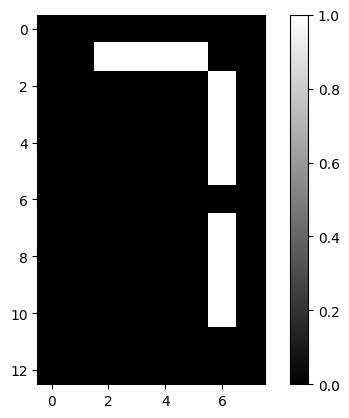

In [46]:
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

### Recommender system

In [50]:
norm_features = normalize(nmf_features)
df = pd.DataFrame(norm_features, titles)
df.head()

,0,1,2,3,4,5
HTTP 404,0.000000,0.0,0.0,0.0,0.0,1.000000
Alexa Internet,0.000000,0.0,0.0,0.0,0.0,1.000000
Internet Explorer,0.009509,0.0,0.0,0.0,0.0,0.999955
HTTP cookie,0.000000,0.0,0.0,0.0,0.0,1.000000
Google Search,0.000000,0.0,0.0,0.0,0.0,1.000000


In [53]:
article = df.loc['Cristiano Ronaldo']
similarities = df.dot(article)
similarities.nlargest()

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64